In [1]:
import sys

import numpy as np

import matplotlib.pyplot as plt

if "/home/axel/Studier/BdG-numerical/methods" not in sys.path:
    sys.path.append("/home/axel/BdG-numerical/methods")
    
from bdg_method import BdG_method
from modified_bdg_method import MBdG_method

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N = 20
Nc = 2
t = 1
mu =0.5 * t
T = 0.2

num_iter = 2000
solver = MBdG_method(N, Nc, mu, t, T, num_iter)

solver.run_solver()
print("done.")

done.


(-1.0, 1.0)

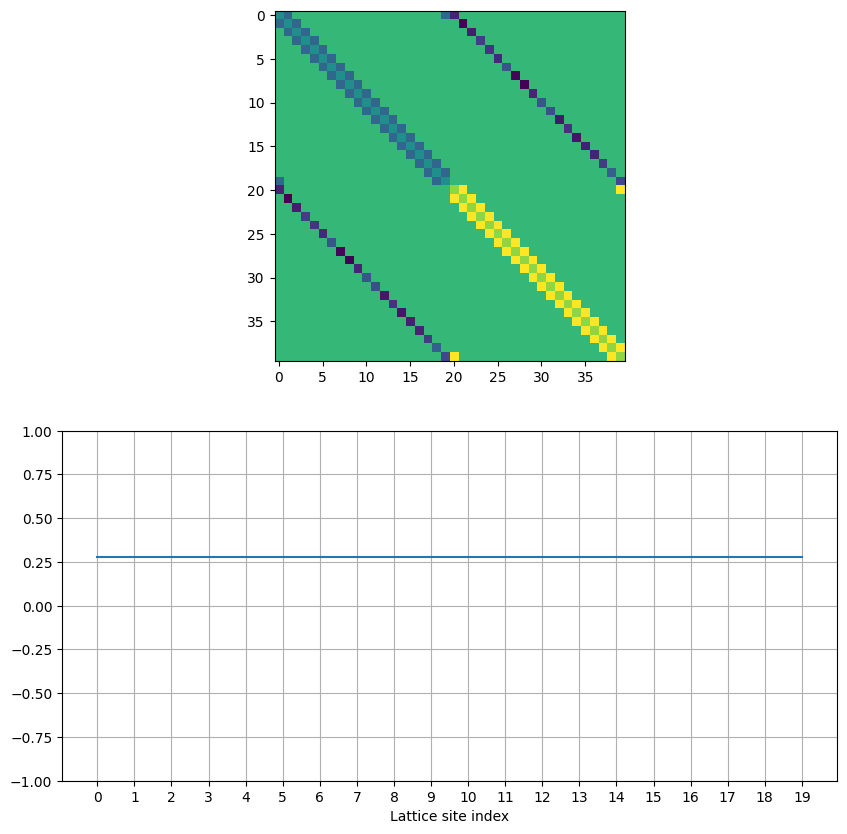

In [15]:
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].imshow(np.real(solver.H_bdg))
delta_diag = np.diagonal(solver.delta)

axs[1].plot(np.real(delta_diag))
axs[1].grid()
axs[1].set_xticks([i for i in range(N)])
axs[1].set_xlabel("Lattice site index")
axs[1].set_ylim(-1, 1)

8.659739592076221e-16


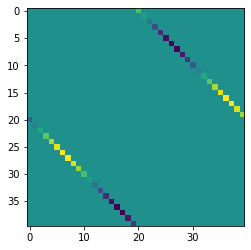

In [37]:
print(np.mean(np.imag(delta_diag)))
plt.imshow(np.imag(solver.H_bdg))

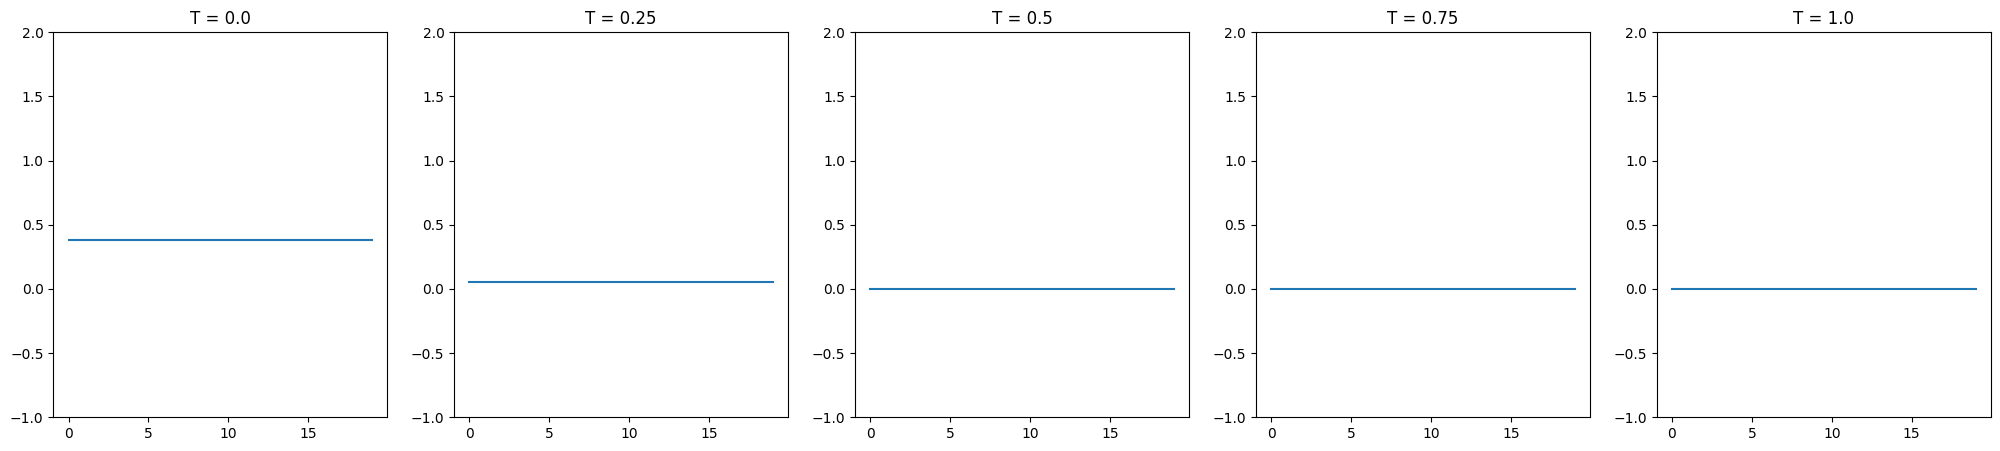

In [23]:
N = 20
Nc = 2
t = 1
mu = 0.5 * t

T_set = np.linspace(0, 1, 5)
num_iter = 100

fig, axs = plt.subplots(1,len(T_set), figsize=(25,5))
last_delta = np.zeros((N,N))

# Creating a BdG instance
for i, T in enumerate(T_set):
    if not np.any(last_delta):
        solver = MBdG_method(N, Nc, mu, t, T, num_iter)
    else:
        solver = MBdG_method(N, Nc, mu, t, T, num_iter, delta=last_delta)
    last_delta = solver.run_solver()
    
    delta_diag = np.diagonal(solver.delta)
    axs[i].plot(np.real(delta_diag))
        
    axs[i].set_title("T = {0}".format(round(T, 3)))
    axs[i].set_ylim(-1, 2)

In [19]:
3.52/2 * 0.25

0.44

T = 0.0: 0.3348195254802704
T = 0.09: 0.326043039560318
T = 0.18: 0.18663856387138367
T = 0.27: 6.241374649107456e-06
T = 0.36: 1.90921123355281e-09
T = 0.44: -8.771579018684861e-10
T = 0.53: -3.5162019962342583e-09
T = 0.62: 4.5547016158664633e-10
T = 0.71: 6.237556027244295e-10
T = 0.8: 1.3969838619232178e-09


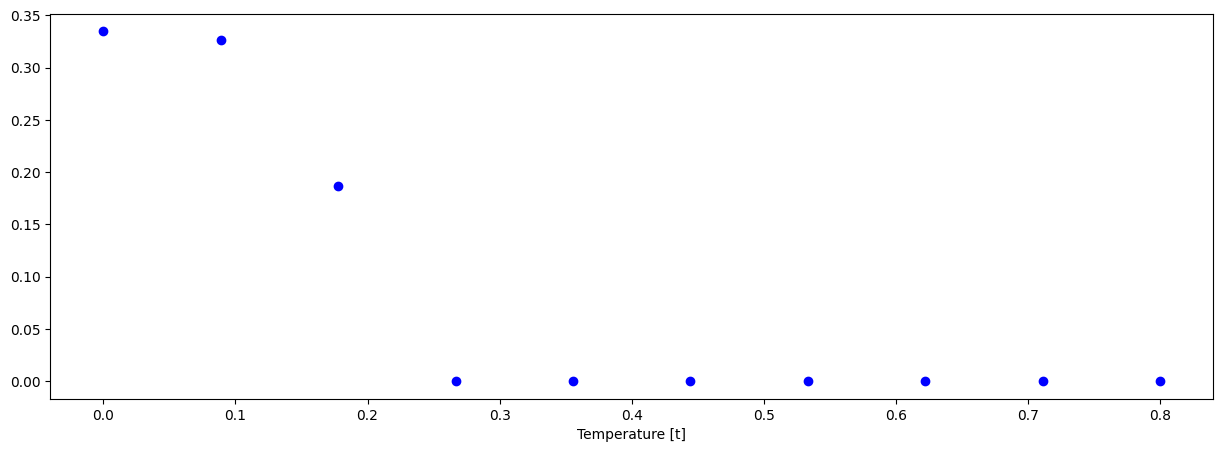

In [14]:
# Calculating the gap parameter amplitude
N = 20
Nc = 2
t = 1
mu = 0.5 * t

num_iter = 100

T_set = np.linspace(0, 0.8*t, 10)

fig, axs = plt.subplots(1, 1, figsize=(15,5))
last_delta = np.zeros((N,N))

# Creating a BdG instance
for i, T in enumerate(T_set):
    if not np.any(last_delta):
        solver = BdG_method(N, Nc, mu, t, T, num_iter)
    else:
        solver = BdG_method(N, Nc, mu, t, T, num_iter, delta=last_delta)
    last_delta = solver.run_solver()
    delta_diag = np.diagonal(solver.delta)
    print("T = {0}: {1}".format(round(T, 2), np.mean(np.real(delta_diag))))
    axs.scatter(T, np.mean(np.real(delta_diag)), c="b")    
    axs.set_xlabel("Temperature [t]")

0.0 0.03 0.07 0.1 0.13 0.17 0.2 0.23 0.27 0.3 
0.0 0.03 0.07 0.1 0.13 0.17 0.2 0.23 0.27 0.3 

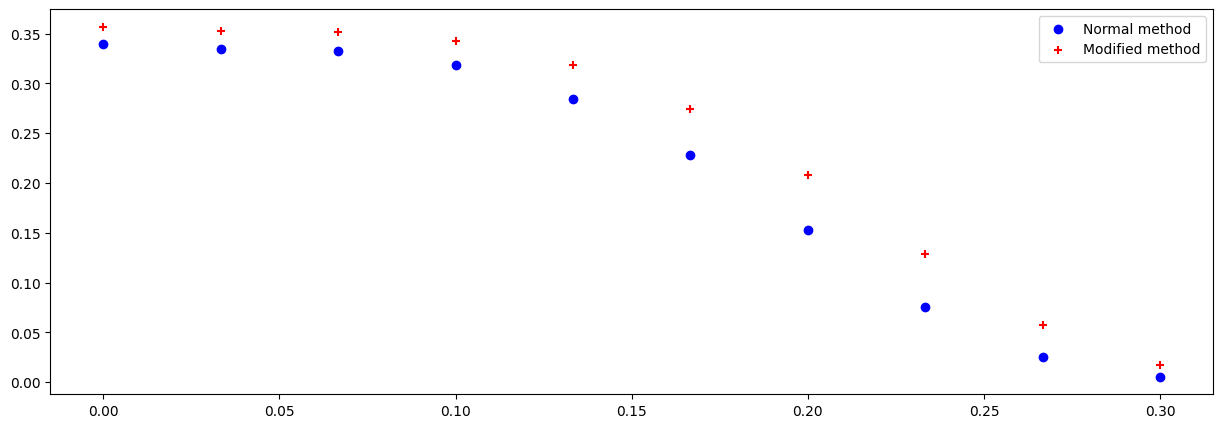

In [25]:
N = 20
Nc = 6

t = 1
mu = 0.1*t
num_iter = 10
T_set = np.linspace(0, 0.3, 10)

# Calculating the gap parameter amplitude
fig, axs = plt.subplots(1, figsize=(15,5))

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="blue", label="Normal method")    
    else:
        axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="blue")    

print("")


# Creating a BdG instance
solver = MBdG_method(N, Nc, mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="red", marker="+", label="Modified method")    
    else:
        axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="red", marker="+")    
    
axs.legend()

# Comparing the two methods.

0.0 0.03 

KeyboardInterrupt: 

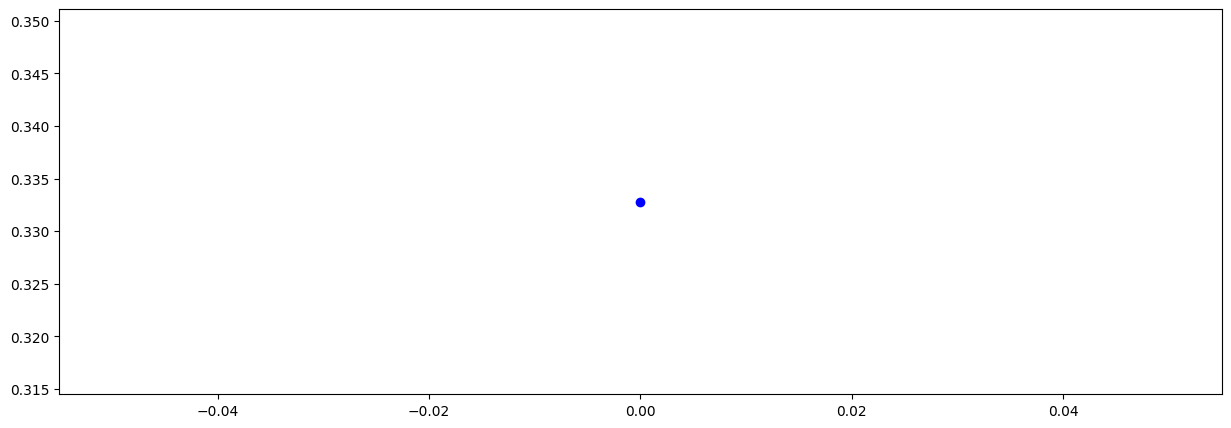

In [4]:
N = 20
Nc = 2
t = 1
mu = 0.1 * t

num_iter = 100
T_set = np.linspace(0, 0.3, 10)

# Calculating the gap parameter amplitude
fig, axs = plt.subplots(1, figsize=(15,5))

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    
    axs.scatter(T, np.real(solver.get_global_delta()), c="b", label="Bdg")    
    
print("")
# Creating a MBdG instance
solver = MBdG_method(N, Nc, mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    
    axs.scatter(T, np.real(solver.get_global_delta()), color="red", marker="+", label="MBdg")    
    

# Seeing how it depends on $N_c$

0.0 0.03 0.07 0.1 0.13 0.17 0.2 0.23 0.27 0.3 
0.0 0.03 0.07 0.1 0.13 0.17 0.2 0.23 0.27 0.3 
0.0 0.03 0.07 0.1 0.13 0.17 0.2 0.23 0.27 0.3 


/tmp/ipykernel_200111/1524240520.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


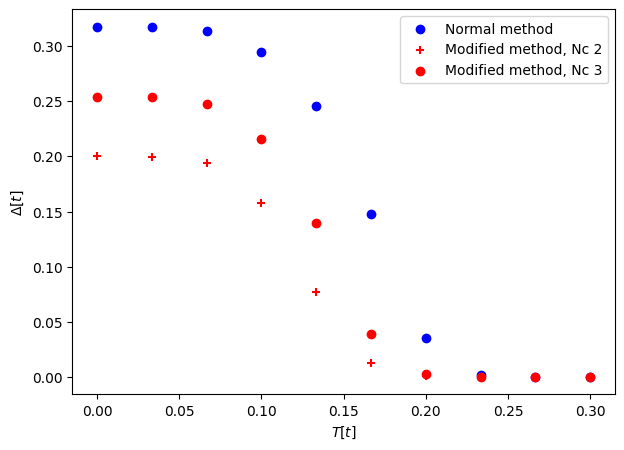

In [6]:
N = 30
Nc_list = [2, 3]
signs = ["+", "o", "x"]

t = 1
mu = 2*t
num_iter = 20
T_set = np.linspace(0, 0.3, 10)

# Calculating the gap parameter amplitude
fig, axs = plt.subplots(1, figsize=(7,5))

# Creating a MBdG instance
solver = BdG_method(N, Nc_list[0], mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="blue", label="Normal method")    
    else:
        axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="blue")    
print("")



for j, Nc in enumerate(Nc_list):
    # Creating a BdG instance
    solver = MBdG_method(N, Nc, mu, t, 0, num_iter)
    for i, T in enumerate(T_set):
        print(round(T, 2), end=" ")
        solver.set_temperature(T)
        last_delta = solver.run_solver()
        if i == 0:
            axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="red", marker=signs[j], label="Modified method, Nc {0}".format(Nc))    
        else:
            axs.scatter(T, np.mean(np.real(np.diag(solver.delta)))/t, color="red", marker=signs[j])    
    print("")
    
axs.set_ylabel(f"$\Delta [t]$")
axs.set_xlabel(f"$T [t]$")
    
axs.legend()

fig.show()

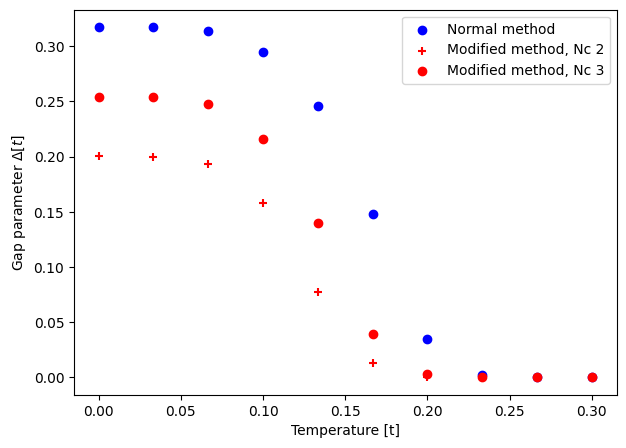

In [14]:
    
axs.set_ylabel(f"Gap parameter $\Delta [t]$")
axs.set_xlabel(f"Temperature [t]")
    
axs.grid()
    
axs.legend()

# fig.savefig("../report/figures/plot.jpg", )
fig.savefig("../report/figures/plot.eps", format="eps")

fig
